## Europe gCO2/kWh from Electricity

This dataset orgins from Kaggle and contains yearly data on EU countries and their emissions from electricity. Additional dataset used is the World Happiness report and data on world electricity usage from the Data Bank. 

The structure is as follows: 
- Average gCO2/kWh per year
- Top five countries with cleanest energy and top five with dirtiest energy - Now and 10 years ago
- Correlation between clean energy and GDP per capita?
- Looking at electricity usage in europe, and the CO2 emission per capita caused by electricity

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [157]:
df = pd.read_csv('2017_CO2_IntensEL_EEA.csv')
df.head()

,CountryShort,CountryLong,Year,ValueNumeric,Unit,Data_source
0,EU28,EU-28,1990,531.232975,gCO2/kWh,EEA
1,EU28,EU-28,1991,516.034467,gCO2/kWh,EEA
2,EU28,EU-28,1992,503.571112,gCO2/kWh,EEA
3,EU28,EU-28,1993,473.999118,gCO2/kWh,EEA
4,EU28,EU-28,1994,469.013303,gCO2/kWh,EEA


In [158]:
df.describe()

,Year,ValueNumeric
count,924.000000,924.000000
mean,2003.500000,421.214865
std,8.082122,288.540983
min,1990.000000,-0.089447
25%,1996.750000,191.996947
50%,2003.500000,414.582838
75%,2010.250000,567.558263
max,2017.000000,1396.100209


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CountryShort  924 non-null    object 
 1   CountryLong   924 non-null    object 
 2   Year          924 non-null    int64  
 3   ValueNumeric  924 non-null    float64
 4   Unit          924 non-null    object 
 5   Data_source   924 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 43.4+ KB


### Average gCO2/kWh per year

In [160]:
df_grouped = df.groupby(by='Year', as_index='True').ValueNumeric.mean()
df_grouped.head()

Year
1990    538.915697
1991    517.963696
1992    520.277598
1993    500.804841
1994    493.591102
Name: ValueNumeric, dtype: float64

Text(0, 0.5, 'gCO2/kWh')

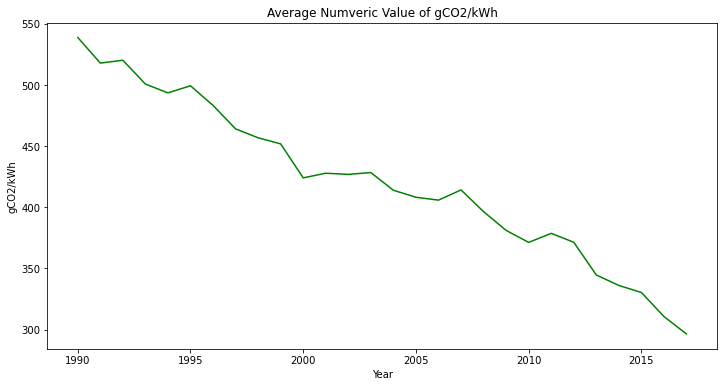

In [161]:
plt.figure(figsize=(12,6))
plt.title('Average Numveric Value of gCO2/kWh')

plt.plot(df_grouped, color='g')
plt.xlabel('Year')
plt.ylabel('gCO2/kWh')

### Top five countries with cleanest and top five dirtiest gCO2/kWm 

In [162]:
df_top = df[df['Year']== 2017].sort_values('ValueNumeric', ascending=True)
df_top

,CountryShort,CountryLong,Year,ValueNumeric,Unit,Data_source
895,IS,Island,2017,0.015958,gCO2/kWh,EEA
811,SE,Sweden,2017,9.274772,gCO2/kWh,EEA
923,NO,Norway,2017,18.923246,gCO2/kWh,EEA
503,LV,Latvia,2017,49.158325,gCO2/kWh,EEA
531,LT,Lithuania,2017,63.686524,gCO2/kWh,EEA
559,LU,Luxembourg,2017,65.183800,gCO2/kWh,EEA
335,FR,France,2017,67.233790,gCO2/kWh,EEA
307,FI,Finland,2017,82.793916,gCO2/kWh,EEA
83,AT,Austria,2017,103.979949,gCO2/kWh,EEA
727,SK,Slovakia,2017,107.305277,gCO2/kWh,EEA


In [163]:
df_clean = df_top.head(5)
df_dirty = df_top.tail(5)

Text(0, 0.5, 'gCO2/kWh')

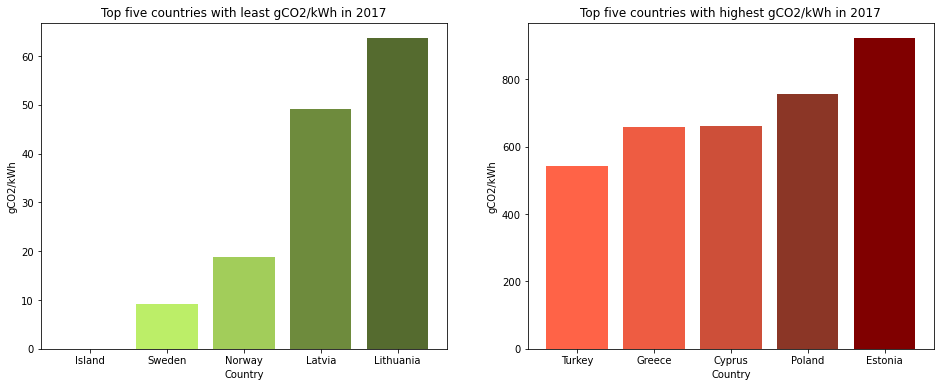

In [164]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.bar(df_clean['CountryLong'], df_clean['ValueNumeric'], color=['#BCEE68','#BCEE68','#A2CD5A','#6E8B3D','#556B2F'])
plt.title('Top five countries with least gCO2/kWh in 2017')
plt.xlabel('Country')
plt.ylabel('gCO2/kWh')

plt.subplot(1,2,2)
plt.bar(df_dirty['CountryLong'], df_dirty['ValueNumeric'], color=['#FF6347', '#EE5C42', '#CD4F39', '#8B3626', '#800000'])
plt.title('Top five countries with highest gCO2/kWh in 2017')
plt.xlabel('Country')
plt.ylabel('gCO2/kWh')

An interesting observation is the difference between the neighboring countires Latvia, Lithuania and Estona, where the difference in CO2 intensity is significant. 

### Correlation between parameters connected to World Happiness Report and gCO2/kWh intensity from Electricity

In [165]:
df1 = pd.read_csv('world-happiness-report.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [166]:
df1['Country & Year'] = df1['Country name'] + df1['year'].astype(str)
df['Country & Year'] = df['CountryLong'] + df['Year'].astype(str)

In [167]:
df_corr = pd.merge(df1, df, on='Country & Year').drop(columns=['Country & Year', 'CountryShort', 'CountryLong', 'Year'])
df_corr = df_corr.rename(columns={'ValueNumeric':'CO2 from Electricity'})

In [168]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 0 to 319
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      320 non-null    object 
 1   year                              320 non-null    int64  
 2   Life Ladder                       320 non-null    float64
 3   Log GDP per capita                320 non-null    float64
 4   Social support                    320 non-null    float64
 5   Healthy life expectancy at birth  320 non-null    float64
 6   Freedom to make life choices      320 non-null    float64
 7   Generosity                        304 non-null    float64
 8   Perceptions of corruption         314 non-null    float64
 9   Positive affect                   320 non-null    float64
 10  Negative affect                   319 non-null    float64
 11  CO2 from Electricity              320 non-null    float64
 12  Unit    

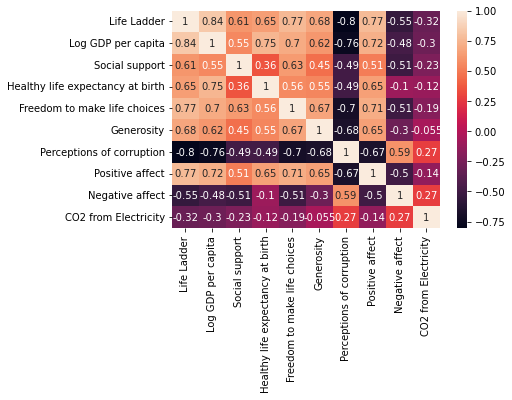

In [169]:
df_corr1 = df_corr.drop(columns=['year'])
corrMatrix = df_corr1.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

There is a weak negative correlation between CO2 from Electricity and most of the other parameters, why it is most likely not important.

### Electricity usage in Europe

In [170]:
#Importing new dataset containing yearly consumption of electricity in Europe
df_cons = pd.read_csv('World_Power_Consumption.csv', header=2)

In [171]:
#Dropping years that wont be needed in the analysis
df_cons.drop(df_cons.iloc[:, 4:34], inplace=True, axis=1)
df_cons.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,791.122818,769.859816,733.351681,728.186412,730.075231,741.642892,...,703.908401,698.369914,686.728057,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
#To only use countries in Europe, we need to add the region column in order to be able to filter.
df_region = pd.read_csv('Metadata_Country.csv', usecols=['Country Code', 'Region'])
df_region.head()

,Country Code,Region
0,ABW,Latin America & Caribbean
1,AFE,NaN
2,AFG,South Asia
3,AFW,NaN
4,AGO,Sub-Saharan Africa


In [173]:
#Mergeing the two datasets
df_merged = pd.merge(left=df_cons, right=df_region, how='inner', on='Country Code')

In [174]:
#Dropping columns that does not contain information
df_merged = df_merged[df_merged['Region']== 'Europe & Central Asia'].drop(
    columns=['2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'])

In [175]:
#Dropping rows that has more than 30 NaN values
df_merged.dropna(axis=0, thresh=30)

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Region
5,Albania,ALB,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,552.252185,418.453589,453.644074,536.363825,596.407959,663.783995,...,1218.360146,1213.124369,1617.744156,1835.684072,1943.343354,2205.703920,2118.327776,2533.252829,2309.366503,Europe & Central Asia
10,Armenia,ARM,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,2722.598500,2689.680533,1962.635282,1195.024488,1045.478466,1050.243539,...,1639.792570,1773.161496,1669.409464,1661.303268,1726.262758,1807.034572,1892.006869,1931.258117,1961.610395,Europe & Central Asia
14,Austria,AUT,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,6111.476520,6347.220096,6227.498049,6137.269463,6205.804904,6344.393087,...,8244.401952,8207.474739,8233.014833,7944.796096,8382.711154,8425.167753,8548.882199,8509.611580,8355.841952,Europe & Central Asia
15,Azerbaijan,AZE,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,2569.823838,2631.028839,2276.061528,2119.736351,1961.943251,1952.022486,...,2552.286214,2118.210528,2040.760435,1620.387420,1603.431374,1705.424633,2052.650965,2092.536521,2202.393918,Europe & Central Asia
17,Belgium,BEL,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,6380.313220,6655.414381,6850.663773,6881.072143,7176.240507,7379.737079,...,8683.671285,8614.679503,8521.496740,7903.955479,8393.949623,8028.798731,7988.524644,7989.671853,7709.123078,Europe & Central Asia
21,Bulgaria,BGR,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,4758.731903,4361.144516,3735.525454,3807.696906,3825.386616,4211.125131,...,4366.912765,4523.322878,4674.503151,4483.747139,4560.414917,4863.691441,4761.912583,4639.706323,4708.927458,Europe & Central Asia
24,Bosnia and Herzegovina,BIH,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,2937.656354,2106.048538,1111.328154,707.781924,893.935187,959.246016,...,2384.593281,2382.539982,2986.473237,2891.637859,3155.598279,3343.737103,3479.083887,3474.286385,3446.764688,Europe & Central Asia
25,Belarus,BLR,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,4380.751349,4426.013214,3912.701745,3450.222433,3068.361990,2790.020749,...,3365.981865,3393.908536,3481.743517,3299.460902,3566.173013,3632.878560,3704.309041,3657.124679,3690.103683,Europe & Central Asia
37,Switzerland,CHE,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,7445.292017,7538.406742,7430.297509,7235.094076,7155.485684,7283.380159,...,8360.576135,8163.295576,8305.923042,8021.223604,8174.408162,7928.190670,7886.094306,7807.058815,7520.166025,Europe & Central Asia
53,Cyprus,CYP,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,2430.160602,2481.098068,2837.836150,3004.580153,3058.162427,2784.691445,...,4238.131129,4377.141095,4554.498654,4577.042480,4585.585156,4239.725400,4035.078755,3587.832841,3624.933502,Europe & Central Asia


In [176]:
#Melting data in order to structure the two datatsets in the same way
df_melted = pd.melt(df_merged, id_vars=['Country Name'], value_vars=df_cons.iloc[:, 4:29])

In [177]:
#Renaming columns
df_melted = df_melted.rename(columns={'value':'Electric power consumption (kWh per capita)', 'variable':'Year'})

In [178]:
#Adding a columns with a unique value
df_melted['Country & Year'] = df_melted['Country Name']+df_melted['Year'].astype(str)

In [179]:
#Mergeing two datatsets and renameing columns
df_power = pd.merge(left=df_melted, right=df, how='inner', on='Country & Year').drop(columns=['Country & Year', 
            'CountryShort', 'CountryLong', 'Year_y', 'Data_source', 'Country and Name', 'Unit'])
df_power = df_power.rename(columns={'Year_x':'Year', 'ValueNumeric':'Electric Carbon Intensity (gCO2/kWh)'})

KeyError: "['Country and Name'] not found in axis"

In [180]:
#Adding a column: Total CO2 emissions from electricity per capita
df_power['CO2 Emissions from Electricity per capita']=df_power['Electric power consumption (kWh per capita)'] * df_power['Electric Carbon Intensity (gCO2/kWh)']/1000

In [181]:
df_power

,Country Name,Year,Electric power consumption (kWh per capita),Electric Carbon Intensity (gCO2/kWh),CO2 Emissions from Electricity per capita
0,Austria,1990,6111.476520,235.499596,1439.250249
1,Belgium,1990,6380.313220,356.769647,2276.302095
2,Bulgaria,1990,4758.731903,543.076759,2584.356697
3,Cyprus,1990,2430.160602,851.676799,2069.711402
4,Czech Republic,1990,5600.407612,751.206771,4207.064118
...,...,...,...,...,...
695,Portugal,2014,4662.600800,294.373624,1372.546693
696,Romania,2014,2584.411787,319.700030,826.236525
697,Slovenia,2014,6727.999302,212.146695,1427.322819
698,Sweden,2014,13480.148224,8.912269,120.138712


In [182]:
df_power.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Country Name                                 700 non-null    object 
 1   Year                                         700 non-null    object 
 2   Electric power consumption (kWh per capita)  700 non-null    float64
 3   Electric Carbon Intensity (gCO2/kWh)         700 non-null    float64
 4   CO2 Emissions from Electricity per capita    700 non-null    float64
dtypes: float64(3), object(2)
memory usage: 32.8+ KB


In [183]:
#Summarizing yearly for all countries, creating a pivot table
df_pivot = pd.pivot_table(df_power, values=['Electric power consumption (kWh per capita)', 
    'Electric Carbon Intensity (gCO2/kWh)', 'CO2 Emissions from Electricity per capita'], columns='Year', aggfunc='sum').T
df_pivot

,CO2 Emissions from Electricity per capita,Electric Carbon Intensity (gCO2/kWh),Electric power consumption (kWh per capita)
Year,,,
1990,68106.745230,15014.631284,168995.591740
1991,66214.159795,14579.363131,169402.244258
1992,65550.425260,14756.137996,165227.137304
1993,63558.651143,14190.053873,163528.768929
1994,64140.849769,13973.560262,167282.266165
1995,72547.073589,14284.244945,171293.203976
1996,73085.275235,13851.855690,174112.382701
1997,66457.091889,13245.718243,177071.226201
1998,64596.561455,13029.918548,180976.544401


#### Plotting graphs

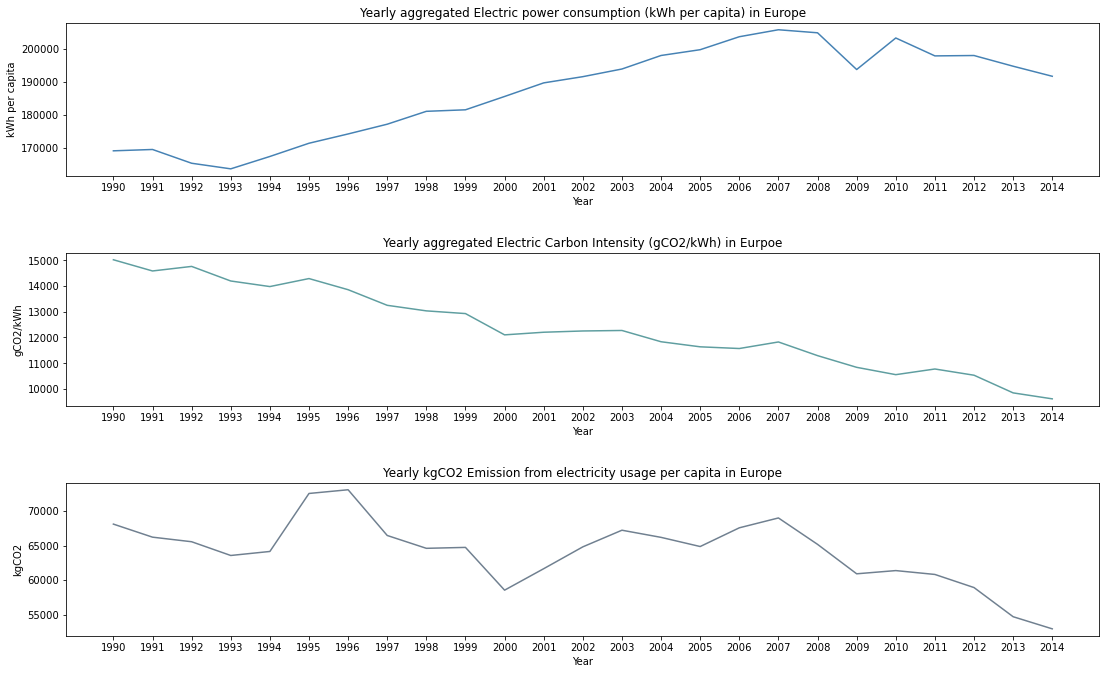

In [184]:
plot_objects = plt.subplots(nrows=3, ncols=1, figsize=(16,10))

fig, (ax1, ax2, ax3)= plot_objects

ax1.plot(df_pivot.index, df_pivot['Electric power consumption (kWh per capita)'], color='Steelblue')
ax1.set_title('Yearly aggregated Electric power consumption (kWh per capita) in Europe')
ax1.set_ylabel('kWh per capita')
ax1.set_xlabel('Year')

ax2.plot(df_pivot.index, df_pivot['Electric Carbon Intensity (gCO2/kWh)'], color='Cadetblue')
ax2.set_title('Yearly aggregated Electric Carbon Intensity (gCO2/kWh) in Eurpoe')
ax2.set_ylabel('gCO2/kWh')
ax2.set_xlabel('Year')

ax3.plot(df_pivot.index, df_pivot['CO2 Emissions from Electricity per capita'], color='Slategrey')
ax3.set_title('Yearly kgCO2 Emission from electricity usage per capita in Europe')
ax3.set_ylabel('kgCO2')
ax3.set_xlabel('Year')

fig.tight_layout(pad=3.0)

- Yearly energy consumption has steadily been uncreasing until 2008. After 2008 it has been decreasing, due to either less usage or energy optimization. 
- The yearly carbon intensity in electricity has every year been decreasing, due to usage of more renewable and cleaner energy sources.
- Multiplying the CO2 intensity and the usage of electricity gives us the CO2 emissions per capita from electricity. The trend for kgCO2 emission from electricity per capita is declining, however with variations from different years. From 1990 to 2014, the CO2 emission per capita from electricity has decreased with 22%. 
- Further, adding the total population in European countries would give us the absolute number of CO2 emission from electricity. 